In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
sns.set(style="white",color_codes=True)

In [2]:
HouseDS=pd.read_csv("HousePS.csv")
HouseDS.head()

Title  \
0                             House Sell at Kohalpur   
1  Hotel On Sale : Business For Sale In Devkota C...   
2             House For Sale In Kausaltar, Bhaktapur   
3  Balkot House For Rent : House For Rent In Balk...   
4       House For Sale In Madhyapur Thimi, Bhaktapur   

                                             Address        City        Price  \
0                         Bidhyanagar,Kohalpur,Banke       Banke    6000000.0   
1  Nearby Gallamandi Road, Devkota Chowk, Bhairahawa  Bhairahawa  125000000.0   
2                    Kausaltar, Kausaltar, Bhaktapur   Bhaktapur   19500000.0   
3                      27.6845464, Balkot, Bhaktapur   Bhaktapur    8500000.0   
4              Nikoshera, Madhyapur Thimi, Bhaktapur   Bhaktapur    8500000.0   

   Bedroom  Bathroom  Floors  Parking       Area                       Road  \
0        2         2     1.0      2.0   1.6 Aana                    11 Feet   
1       16        20     3.0      1.0    32 Aana                    55 Feet   
2        5         0     4.0      0.0   3.5 Aana  20 Feet / Soil Stabilized   
3        4         1     3.0      0.0    12 Aana  12 Feet / Soil Stabilized   
4        2         1     3.0      0.0  2.22 Aana  8 Meter / Soil Stabilized   

  Road Width         Road Type  \
0    11 Feet         Gravelled   
1    55 Feet               NaN   
2   20 Feet    Soil Stabilized   
3   12 Feet    Soil Stabilized   
4   8 Meter    Soil Stabilized   

                                           Amenities   Face  
0                       ['Drainage', 'Water Supply']   East  
1  ['Lawn', 'Air Condition', 'Microwave', 'TV Cab...  South  
2  ['Balcony', 'TV Cable', 'Wifi', 'Drainage', 'W...  South  
3                                                 []  North  
4                                                 []   East

In [3]:
def extract_addr(Address):
    parts = Address.split(',')
    if len(parts) >= 2:
        return parts[1]
HouseDS['New_address'] = HouseDS['Address'].apply(extract_addr)

In [4]:
HouseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1454 non-null   object 
 1   Address      1454 non-null   object 
 2   City         1454 non-null   object 
 3   Price        1454 non-null   float64
 4   Bedroom      1454 non-null   int64  
 5   Bathroom     1454 non-null   int64  
 6   Floors       1454 non-null   float64
 7   Parking      1454 non-null   float64
 8   Area         1454 non-null   object 
 9   Road         1454 non-null   object 
 10  Road Width   1454 non-null   object 
 11  Road Type    1120 non-null   object 
 12  Amenities    1454 non-null   object 
 13  Face         1215 non-null   object 
 14  New_address  1451 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 170.5+ KB


In [5]:
def parse_road_width(x):
    qty,measure=x.split(' ')[0],x.split(' ')[1]
    if measure =='Feet':
        return float(qty)*0.3048
    return float(qty)
HouseDS['road_width_meters']=HouseDS['Road Width'].astype('str').apply(parse_road_width)

In [6]:
del HouseDS['Road Width']
del HouseDS['Title']

In [7]:
#House_area extracted with only float numbers
def parse_area(x):
    qty=x.split(' ')[0]
    return float(qty)
HouseDS['house_area']=HouseDS['Area'].astype('str').apply(parse_area)
del HouseDS['Area']

In [8]:
#LabelEncoding to convert String value to Numeric value
le = LabelEncoder()
HouseDS['City'] = le.fit_transform(HouseDS['City'])
HouseDS['New_address'] = le.fit_transform(HouseDS['New_address'])
HouseDS['Road Type'] = le.fit_transform(HouseDS['Road Type'])
HouseDS[0:25]

Address  City        Price  \
0                          Bidhyanagar,Kohalpur,Banke     0    6000000.0   
1   Nearby Gallamandi Road, Devkota Chowk, Bhairahawa     1  125000000.0   
2                     Kausaltar, Kausaltar, Bhaktapur     2   19500000.0   
3                       27.6845464, Balkot, Bhaktapur     2    8500000.0   
4               Nikoshera, Madhyapur Thimi, Bhaktapur     2    8500000.0   
5                         Duwakot, Duwakot, Bhaktapur     2    9500000.0   
6                              124, Balkot, Bhaktapur     2   15500000.0   
7                        Dadhikot, Dadikot, Bhaktapur     2   11500000.0   
8                                Nalinchowk,Bhaktapur     2   15000000.0   
9                    kausaltar, Gatthaghar, Bhaktapur     2   12500000.0   
10             Rose Village Balkot, Balkot, Bhaktapur     2   29000000.0   
11                    Rose Village, Balkot, Bhaktapur     2   39999999.0   
12                  Lokanthali, Lokanthali, Bhaktapur     2   35000000.0   
13                        Sipadol, Sipadol, Bhaktapur     2   20500000.0   
14                 Jhaukhel, Changunarayan, Bhaktapur     2   12000000.0   
15                  Lokanthali, Lokanthali, Bhaktapur     2   27000000.0   
16                 Jhaukhel, Changunarayan, Bhaktapur     2   21500000.0   
17                 Thathali, Changunarayan, Bhaktapur     2   10500000.0   
18                       Khalpitar, Balkot, Bhaktapur     2   25000000.0   
19                    bhaktapur, Bhaktapur, Bhaktapur     2   21500000.0   
20    Rose Village Balkot, Madhyapur Thimi, Bhaktapur     2   35000000.0   
21                       Gamcha, Bhaktapur, Bhaktapur     2   32500000.0   
22                    Kausaltar, Kausaltar, Bhaktapur     2   30000000.0   
23               Darjeling Height, Sipadol, Bhaktapur     2   19000000.0   
24                        Dadikot, Dadikot, Bhaktapur     2   22500000.0   

    Bedroom  Bathroom  Floors  Parking                       Road  Road Type  \
0         2         2     1.0      2.0                    11 Feet          8   
1        16        20     3.0      1.0                    55 Feet         11   
2         5         0     4.0      0.0  20 Feet / Soil Stabilized          5   
3         4         1     3.0      0.0  12 Feet / Soil Stabilized          5   
4         2         1     3.0      0.0  8 Meter / Soil Stabilized          5   
5         3         2     3.0      0.0        13 Feet / Gravelled          3   
6         4         2     3.0      1.0        13 Feet / Gravelled          3   
7         3         3     3.0      0.0        12 Feet / Gravelled          3   
8         2         3     2.5      5.0                     8 Feet          8   
9         2         3     2.0      0.0                    16 Feet         11   
10        3         3     2.0      2.0      20 Feet / Blacktopped          1   
11        4         3     3.0      2.0      28 Feet / Blacktopped          1   
12        6         3     3.0      2.0                    18 Feet         11   
13        7         3     3.0      1.0        10 Feet / Gravelled          3   
14       10         3     3.0      7.0                    32 Feet          9   
15       16         3     3.0      0.0      13 Feet / Blacktopped          1   
16        4         4     3.5      0.0        15 Feet / Gravelled          3   
17        2         4     3.0      0.0      10 Feet / Blacktopped          1   
18        2         4     1.0      1.0        13 Feet / Gravelled          3   
19        9         4     3.0      1.0                    20 Feet         11   
20        3         4     2.0      3.0      30 Feet / Blacktopped          1   
21        4         4     2.0      4.0            20 Feet / Paved          4   
22        5         4     3.0      0.0      15 Feet / Blacktopped          1   
23        7         4     3.5      1.0        20 Feet / Gravelled          3   
24       12         4     3.0      0.0                    20 Feet    

In [9]:
# Define the list of amenities
amenities_list =['Parking','Drainage','Water Supply','Internet', 'CCTV', 'Electricity Backup', 'Garden','Balcony']
house_face_list=['East', 'West', 'North', 'South','North East', 'North West', 'South East', 'South West']

In [10]:
# Create binary columns for each amenity
for amenity in amenities_list:
    HouseDS[amenity] = HouseDS['Amenities'].apply(lambda x: 1 if amenity in x else 0)
for face in house_face_list:
    HouseDS[face] = HouseDS['Face'].apply(lambda x: 1 if isinstance(x, str) and face in x else 0)        

In [11]:
#Sorting value of price in Descending order,Higher Price appears first 
HouseDS=HouseDS.sort_values(by=['Price'],ascending=False)

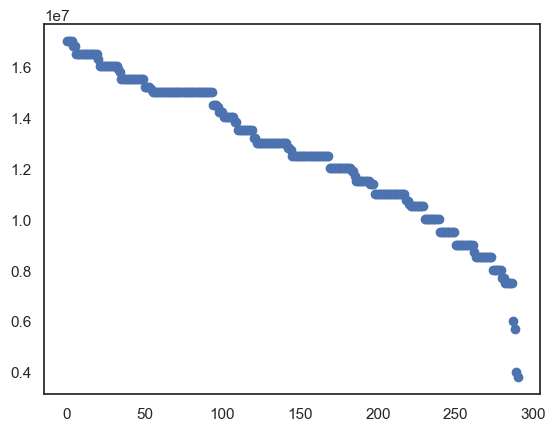

In [12]:
#Scatter plot with excluding top 20% price
exclude_top=int(0.8*len(HouseDS.Price))
plt.scatter(np.arange(0,len(HouseDS.Price[exclude_top:])),HouseDS.Price[exclude_top:])

City     Price   Bedroom  Bathroom    Floors  \
City                1.000000 -0.046704 -0.122394 -0.050223 -0.043853   
Price              -0.046704  1.000000  0.351719  0.383154  0.221277   
Bedroom            -0.122394  0.351719  1.000000  0.539686  0.409103   
Bathroom           -0.050223  0.383154  0.539686  1.000000  0.308424   
Floors             -0.043853  0.221277  0.409103  0.308424  1.000000   
Parking             0.063011  0.001328 -0.005693  0.009143 -0.063218   
Road Type           0.033711 -0.073977 -0.043024 -0.070405  0.025680   
New_address         0.144186 -0.140609 -0.056991 -0.053910 -0.085289   
road_width_meters   0.008511  0.063201  0.005304  0.050117  0.054905   
house_area         -0.034533  0.484538  0.133998  0.193431  0.037098   
Drainage           -0.027711  0.082700  0.060959  0.020655  0.016633   
Internet           -0.014700  0.052285  0.009148 -0.073618 -0.079955   
CCTV               -0.039348  0.138333  0.006249  0.025811  0.056500   
Electricity Backup -0.011541  0.045500  0.001537 -0.033942 -0.054964   
Garden             -0.008149  0.263367  0.017397  0.037702 -0.010227   
Balcony            -0.020637  0.103047  0.061502 -0.038174  0.050290   
East               -0.029878  0.022763  0.026646  0.026966  0.021283   
West               -0.019414  0.009613 -0.066244 -0.021387 -0.039782   
North              -0.031665 -0.007966  0.010231  0.032851  0.017719   
South               0.049193 -0.041920  0.014300  0.030254 -0.020048   
North East         -0.061693  0.006584  0.030522 -0.007650  0.029115   
North West         -0.016196  0.005875  0.023851  0.014971 -0.002944   
South East          0.003692 -0.004055  0.049947  0.045892 -0.006917   
South West          0.021887  0.004915 -0.013279  0.009278  0.015135   

                     Parking  Road Type  New_address  road_width_meters  \
City                0.063011   0.033711     0.144186           0.008511   
Price               0.001328  -0.073977    -0.140609           0.063201   
Bedroom            -0.005693  -0.043024    -0.056991           0.005304   
Bathroom            0.009143  -0.070405    -0.053910           0.050117   
Floors             -0.063218   0.025680    -0.085289           0.054905   
Parking             1.000000  -0.208989     0.006972          -0.032782   
Road Type          -0.208989   1.000000     0.145071          -0.061468   
New_address         0.006972   0.145071     1.000000           0.013909   
road_width_meters  -0.032782  -0.061468     0.013909           1.000000   
house_area         -0.005528   0.040576    -0.091720           0.047227   
Drainage            0.260978   0.004399     0.050636          -0.009345   
Internet            0.398641  -0.193837    -0.013610          -0.016071   
CCTV                0.171195  -0.131551    -0.110443           0.033213   
Electricity Backup  0.311529  -0.115180     0.030726           0.066395   
Garden              0.127412  -0.146403    -0.142187           0.046206   
Balcony             0.211994   0.035413    -0.024058           0.008881   
East               -0.094787   0.071036    -0.051142           0.009176   
West               -0.042832   0.093112     0.036124           0.014904   
North               0.007908   0.070542    -0.004059          -0.011040   
South              -0.086084   0.094149     0.030189          -0.022298   
North East         -0.005938   0.052520    -0.052679           0.005694   
North West          0.037325   0.051413    -0.017696          -0.007705   
South East         -0.064386   0.049578    -0.016886          -0.025641   
South West         -0.014749   0.052953     0.028828          -0.009704   

                    house_area  ...    Garden   Balcony      East      West  \
City                 -0.034533  ... -0.008149 -0.020637 -0.029878 -0.019414   
Price                 0.484538  ...  0.263367  0.103047  0.022763  0.009613   
Bedroom               0.133998  ...  0.017397  0.061502  0.026646 -0.066244   
Bathroom              0.193431 

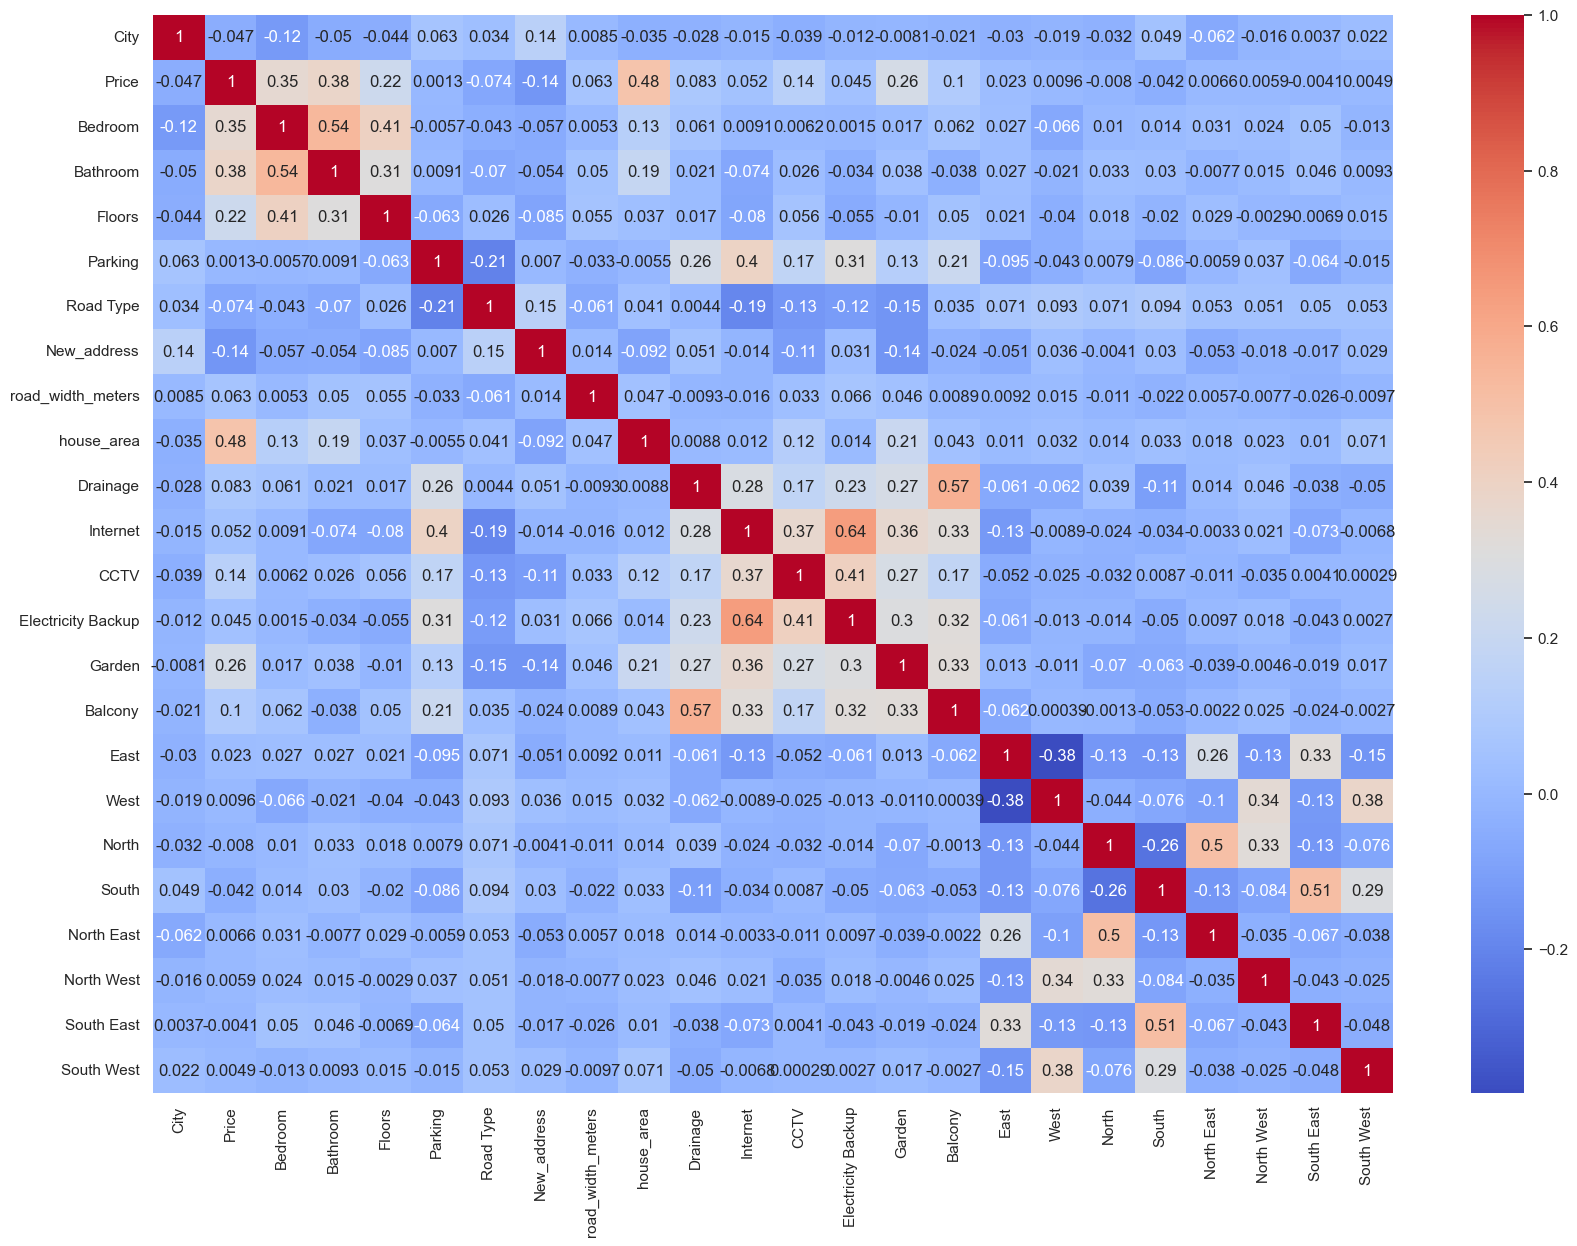

In [13]:
#correlations of Data
X=HouseDS.drop(['Road','Amenities','Face','Water Supply','Address'],axis=1)
plt.figure(figsize=(20, 14))
sns.heatmap(X.corr(),annot=True,cmap="coolwarm")
X.corr()

In [14]:
#splitting Data set into Training and testing sets
X=HouseDS.drop(['Price','Road','Face','Amenities','Water Supply','Address'],axis=1)
y=HouseDS['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Floors'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Road Type'}>,
        <Axes: title={'center': 'New_address'}>,
        <Axes: title={'center': 'road_width_meters'}>,
        <Axes: title={'center': 'house_area'}>,
        <Axes: title={'center': 'Drainage'}>],
       [<Axes: title={'center': 'Internet'}>,
        <Axes: title={'center': 'CCTV'}>,
        <Axes: title={'center': 'Electricity Backup'}>,
        <Axes: title={'center': 'Garden'}>,
        <Axes: title={'center': 'Balcony'}>],
       [<Axes: title={'center': 'East'}>,
        <Axes: title={'center': 'West'}>,
        <Axes: title={'center': 'North'}>,
        <Axes: title={'center': 'South'}>,
        <Axes: title={'center': 'North East'}>],
       [<Axes: title={'center': 'North West'}>,
        <Axes: title={'center'

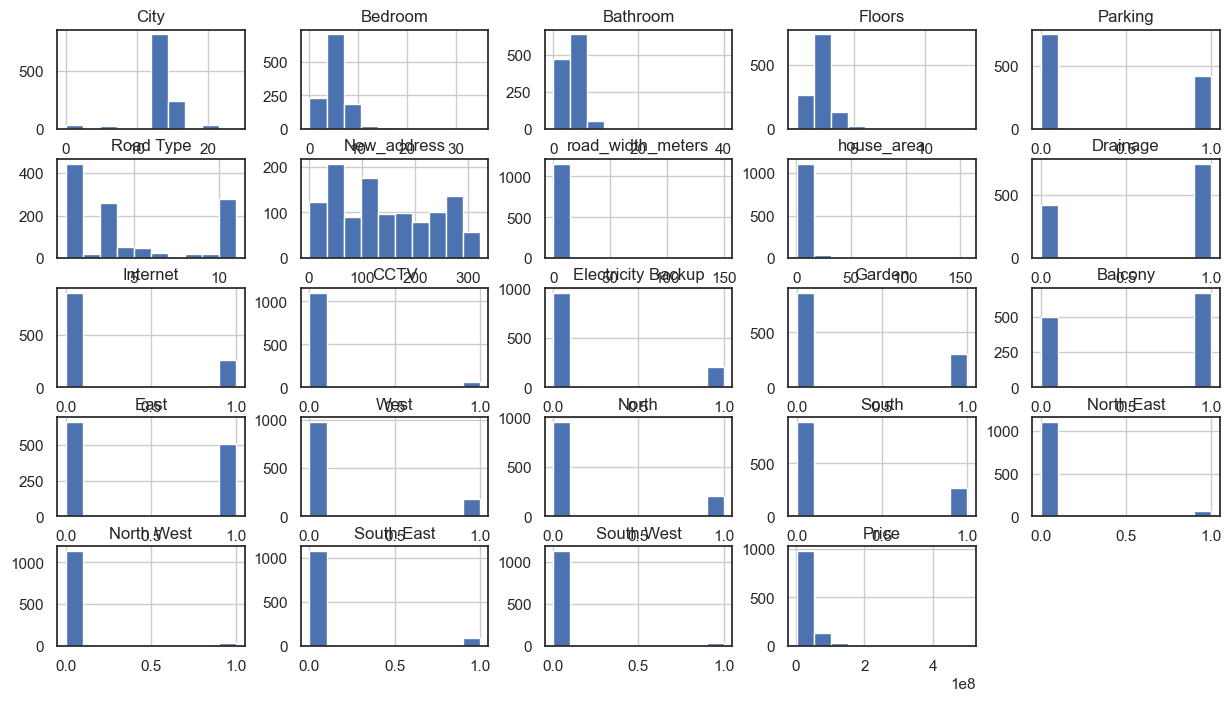

In [15]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1163, 23) (291, 23) (1163,) (291,)


In [17]:
HouseDS.describe()

City         Price      Bedroom     Bathroom       Floors  \
count  1454.000000  1.454000e+03  1454.000000  1454.000000  1454.000000   
mean     12.645117  3.682803e+07     5.308803     4.182256     2.844945   
std       3.081915  3.847458e+07     2.579279     2.245237     0.857342   
min       0.000000  3.800000e+06     0.000000     0.000000     1.000000   
25%      12.000000  1.800000e+07     4.000000     3.000000     2.500000   
50%      12.000000  2.600000e+07     5.000000     4.000000     3.000000   
75%      12.000000  4.000000e+07     6.000000     5.000000     3.000000   
max      24.000000  5.000000e+08    35.000000    40.000000    13.000000   

           Parking    Road Type  New_address  road_width_meters   house_area  \
count  1454.000000  1454.000000  1454.000000        1454.000000  1454.000000   
mean      0.350069     4.449106   144.095598           4.805373     6.530483   
std       0.477155     3.979449    89.851831           4.261552     8.061028   
min       0.000000     0.000000     0.000000           0.000000     0.500000   
25%       0.000000     1.000000    55.000000           3.962400     3.381250   
50%       0.000000     3.000000   126.000000           4.267200     4.580000   
75%       1.000000     9.000000   225.000000           6.096000     7.000000   
max       1.000000    11.000000   322.000000         150.000000   156.750000   

       ...       Garden      Balcony         East         West        North  \
count  ...  1454.000000  1454.000000  1454.000000  1454.000000  1454.000000   
mean   ...     0.263411     0.572215     0.435351     0.160935     0.174691   
std    ...     0.440635     0.494928     0.495973     0.367598     0.379833   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     1.000000     0.000000     0.000000     0.000000   
75%    ...     1.000000     1.000000     1.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

             South   North East   North West   South East   South West  
count  1454.000000  1454.000000  1454.000000  1454.000000  1454.000000  
mean      0.240715     0.050894     0.022008     0.076341     0.026823  
std       0.427665     0.219857     0.146761     0.265635     0.161620  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

In [18]:
#feature scaling(to normalize feature variables)
#np.random.seed(42)with_mean=False
scaler = StandardScaler()
#X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [19]:
svm_model=SVR(kernel='linear')

In [20]:
#Training the model
svm_model.fit(X_train,y_train)

SVR(kernel='linear')

In [21]:
#Making predictions on test set
pred_price=svm_model.predict(X_test)
#print("Your Predicted Price is ",pred_price)

In [22]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_price)

In [23]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1201104352241783.8
Root Mean Squared Error (RMSE): 34656952.43730735
R-squared (R2): -0.06890458390713716


In [24]:
'''new_house=[[1286,17,5,6,3,5,5,3.6576]]
new_house_scale=scaler.transform(new_house)
pred_price=svm_model.predict(new_house)
print("Your Predicted Price is ",pred_price)'''

'new_house=[[1286,17,5,6,3,5,5,3.6576]]\nnew_house_scale=scaler.transform(new_house)\npred_price=svm_model.predict(new_house)\nprint("Your Predicted Price is ",pred_price)'

In [25]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Create a Random Forest Regressor and Train the model using the training sets 
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
#Prediction on train Data
y_pred = rf.predict(X_train)

In [28]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9019647153788062
Adjusted R^2: 0.8999850739861043
MAE: 5029698.925500143
MSE: 153724272461618.62
RMSE: 12398559.289756961


In [29]:
#Scores from Model
print('Random Forest: ',rf.score(X_test,y_test))
print('SVM: ',svm_model.score(X_test,y_test))

Random Forest:  0.4447240246328471
SVM:  -0.06890458390713716


In [30]:
new_house=[[45,3,5,4,1,5,5,6,10,1,0,1,0,2,0,0,0,1,0,0,0,0,1]]
new_house_scale=scaler.transform(new_house)
pred_price=rf.predict(new_house)
print("Your Predicted Price is ",pred_price)

Your Predicted Price is  [60807770.]


C:\Users\legion\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\legion\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
encoded_data = HouseDS[['New_address','City','Road Type']]

# Save the encoded data to a CSV file
encoded_data.to_csv('encoded_data.csv', index=False)

In [32]:
encoded_data = pd.read_csv('encoded_data.csv')

In [33]:
encoded_data.head()

New_address  City  Road Type
0           58    12          1
1           55    12          1
2           55    12          1
3          164    20         11
4            4    12          1

In [34]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(HouseDS, model_file)

In [35]:
# def predict_house_price(address, city, bedrooms, bathrooms, floors, parking, area, face, road_width, road_type, amenities):
#   input_data = HouseDS.DataFrame({
#         'New_address': [address],
#         'City': [city],
#         'Bedroom': [bedrooms],
#         'Bathroom': [bathrooms],
#         'Floors': [floors],
#         'Parking': [parking],
#         'Area': [area],
#         'Face': [face],
#         'Road Width': [road_width],
#         'Road Type': [road_type],
#         'Amenities': [amenities]
#     })

#     predicted_price = rf.predict(input_data)

#     return predicted_price[0]  
def predict_house_price(address, city, bedrooms, bathrooms, floors, parking, area, face, road_width, road_type, amenities):
input_data = pd.DataFrame({
    'New_address': [address],
    'City': [city],
    'Bedroom': [bedrooms],
    'Bathroom': [bathrooms],
    'Floors': [floors],
    'Parking': [parking],
    'Area': [area],
    'Face': [face],
    'road_width_meters': [road_width],
    'Road Type': [road_type],
    'Amenities': [amenities],
    'Balcony': [0],  # Add binary columns with appropriate values
    'CCTV': [0],
    'Drainage': [0],
    'East': [0],
    'Electricity Backup': [0],
    # Add all other binary columns here
})
    })

    predicted_price = rf.predict(input_data)

    return predicted_price[0]

SyntaxError: unmatched '}' (2452268008.py, line 39)

In [ ]:
predicted_price = predict_house_price(
    address='',
    city='',
    road_type='',
    amenities='',
    face='',
    bedrooms=3,
    bathrooms=2,
    floors=2,
    parking=1,
    road_width=0,
    area=150
)